# Predicción de deserción de un empleado

In [91]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# Descargar el dataset

handle = 'raminhuseyn/hr-analytics-data-set'

api.dataset_download_files(handle, path='../data/raw', unzip=True)


OSError: Could not find kaggle.json. Make sure it's located in /home/vscode/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

In [ ]:
import pandas as pd

df = pd.read_csv('../data/raw/HR_capstone_dataset.csv')

df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df['left'] = df['left'].map({0: 'No', 1: 'Yes'})
df['Work_accident'] = df['Work_accident'].map({0: 'No', 1: 'Yes'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          0 non-null      object 
 6   left                   0 non-null      object 
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB


In [ ]:
#Vamos a guardar los datos en una base de datos SQLite
import sqlite3

my_connection = sqlite3.connect('../data/raw/hr.db')

my_cursor = my_connection.cursor()

# Crear la tabla
my_cursor.execute('''
CREATE TABLE IF NOT EXISTS hr (
    left INTEGER PRIMARY KEY,
    satisfaction_level REAL,
    last_evaluation REAL,
    number_project INTEGER,
    average_monthly_hours REAL,
    time_spend_company INTEGER,
    Work_accident INTEGER,
    promotion_last_5years INTEGER,
    department TEXT,
    salary TEXT
)
''')
#Ahora vamos a insertar los datos en la tabla
df.to_sql('hr', my_connection, if_exists='replace', index=False)
# Comprobar que se han insertado los datos
my_cursor.execute('SELECT * FROM hr LIMIT 5')
rows = my_cursor.fetchall()
for row in rows:
    print(row)
# Cerrar la conexión
my_connection.close()

(0.38, 0.53, 2, 157, 3, None, None, 0, 'sales', 'low')
(0.8, 0.86, 5, 262, 6, None, None, 0, 'sales', 'medium')
(0.11, 0.88, 7, 272, 4, None, None, 0, 'sales', 'medium')
(0.72, 0.87, 5, 223, 5, None, None, 0, 'sales', 'low')
(0.37, 0.52, 2, 159, 3, None, None, 0, 'sales', 'low')


In [ ]:
df.drop_duplicates()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,NaN,NaN,0,sales,low
1,0.80,0.86,5,262,6,NaN,NaN,0,sales,medium
2,0.11,0.88,7,272,4,NaN,NaN,0,sales,medium
3,0.72,0.87,5,223,5,NaN,NaN,0,sales,low
4,0.37,0.52,2,159,3,NaN,NaN,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,NaN,NaN,1,management,high
11996,0.74,0.95,5,266,10,NaN,NaN,1,management,high
11997,0.85,0.54,3,185,10,NaN,NaN,1,management,high
11998,0.33,0.65,3,172,10,NaN,NaN,1,marketing,high


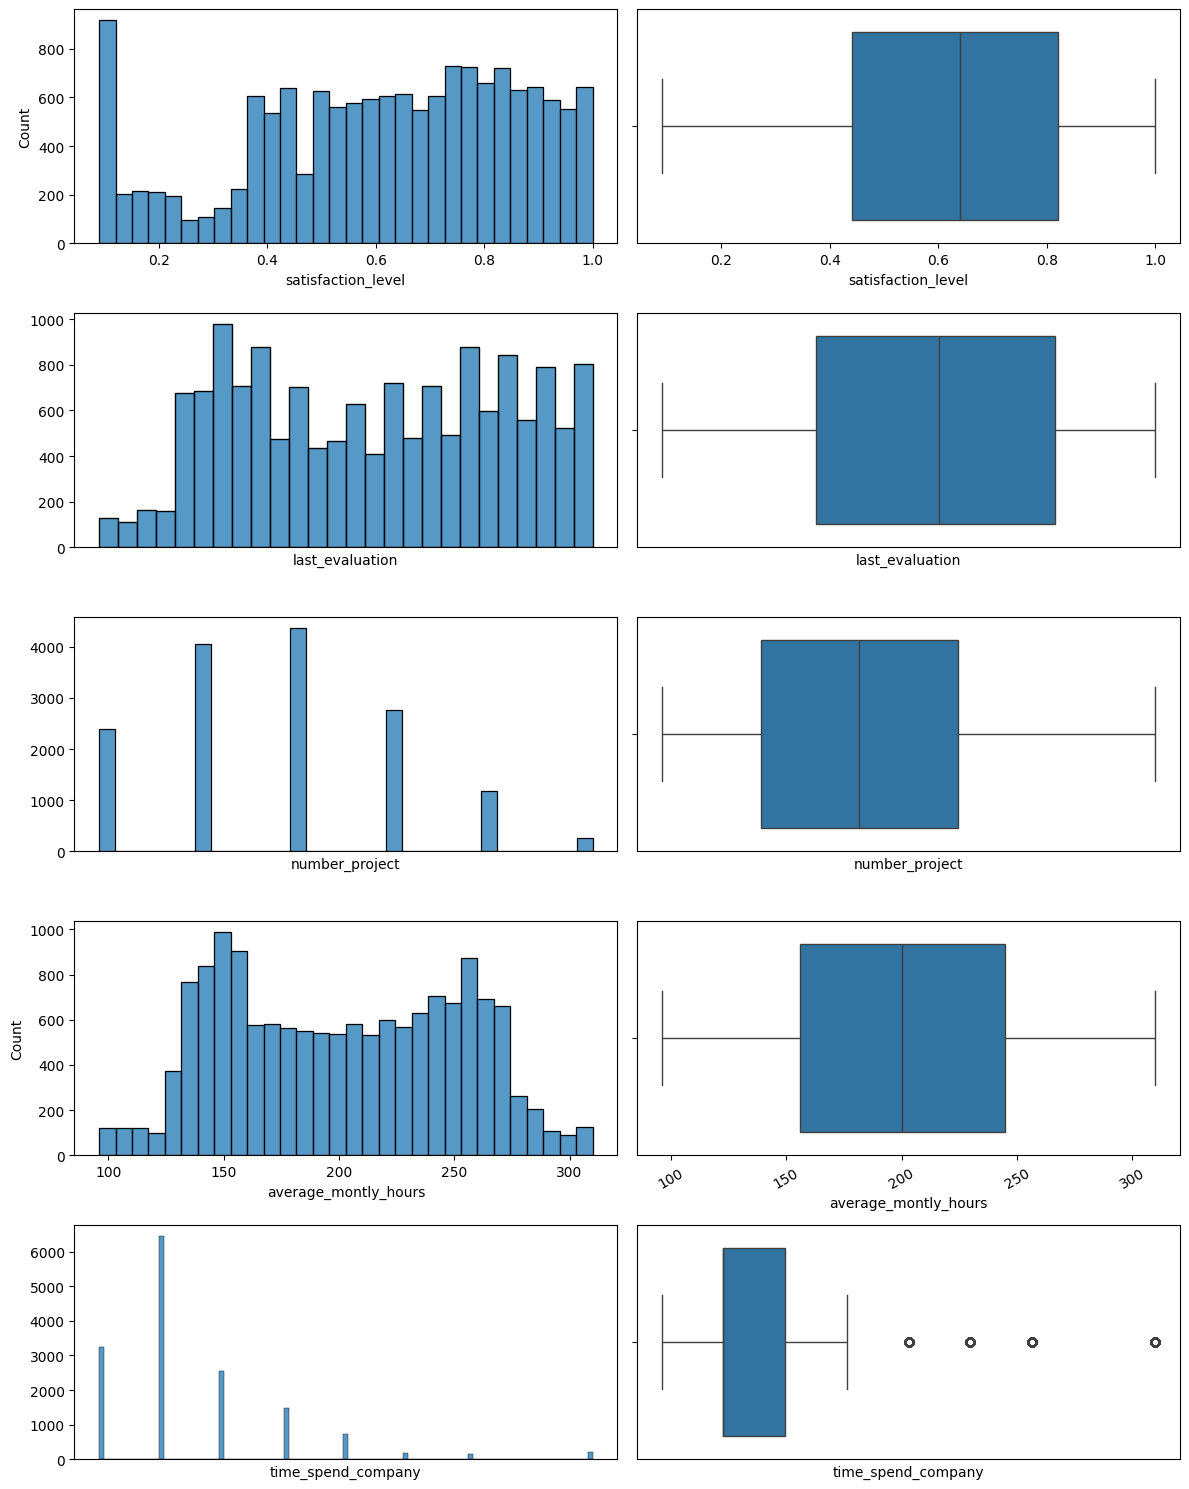

In [ ]:
#Analisis univariante Numerico
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(5, 2, figsize=(12, 15)) # Adjusted rows for five variables

sns.histplot(ax=axes[0, 0], data=df, x='satisfaction_level')
sns.boxplot(ax=axes[0, 1], data=df, x='satisfaction_level')

sns.histplot(ax=axes[1, 0], data=df, x='last_evaluation').set(ylabel=None, xticks=[])
sns.boxplot(ax=axes[1, 1], data=df, x='last_evaluation').set(ylabel=None, xticks=[])

sns.histplot(ax=axes[2, 0], data=df, x='number_project').set(ylabel=None, xticks=[])
sns.boxplot(ax=axes[2, 1], data=df, x='number_project').set(ylabel=None, xticks=[])

sns.histplot(ax=axes[3, 0], data=df, x='average_montly_hours')
sns.boxplot(ax=axes[3, 1], data=df, x='average_montly_hours')
axes[3, 1].tick_params(axis='x', rotation=30) # Rotated x-axis labels

sns.histplot(ax=axes[4, 0], data=df, x='time_spend_company').set(ylabel=None, xticks=[])
sns.boxplot(ax=axes[4, 1], data=df, x='time_spend_company').set(ylabel=None, xticks=[])

plt.tight_layout()
plt.show()

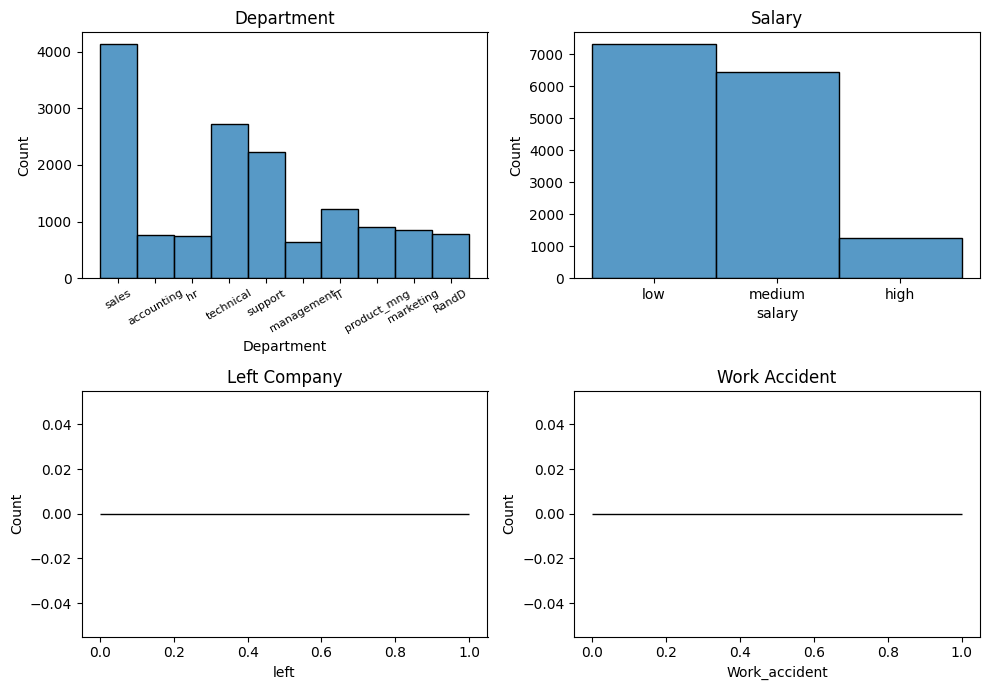

In [94]:
#Analisis univariante Categorico

import matplotlib.pyplot as plt
import seaborn as sns

'''fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Department
sns.countplot(ax=axes[0, 0], data=df, x='Department')
axes[0, 0].set_title('Department')
axes[0, 0].tick_params(axis='x', rotation=30, labelsize=8)

# Salary
sns.countplot(ax=axes[0, 1], data=df, x='salary')
axes[0, 1].set_title('Salary')
axes[0, 1].set_ylabel('')

# Left Company
sns.histplot(ax=axes[1, 0], data=df, x='left')
axes[1, 0].set_title('Left Company')

# Work Accident
sns.histplot(ax=axes[1, 1], data=df, x='Work_accident')
axes[1, 1].set_title('Work Accident')

plt.tight_layout()
plt.show()'''


fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Department
sns.histplot(ax=axes[0, 0], data=df, x='Department')
axes[0, 0].tick_params(axis='x', rotation=30, labelsize=8)
axes[0, 0].set_title('Department')

# Salary
sns.histplot(ax=axes[0, 1], data=df, x='salary')
axes[0, 1].set_title('Salary')

# Left Company (using countplot for categorical data)
sns.histplot(ax=axes[1, 0], data=df, x='left')
axes[1, 0].set_title('Left Company')
axes[1, 0].set_ylabel('Count') # Add a y-axis label

# Work Accident (using countplot for categorical data)
sns.histplot(ax=axes[1, 1], data=df, x='Work_accident')
axes[1, 1].set_title('Work Accident')
axes[1, 1].set_ylabel('Count') # Add a y-axis label

plt.tight_layout()
plt.show()

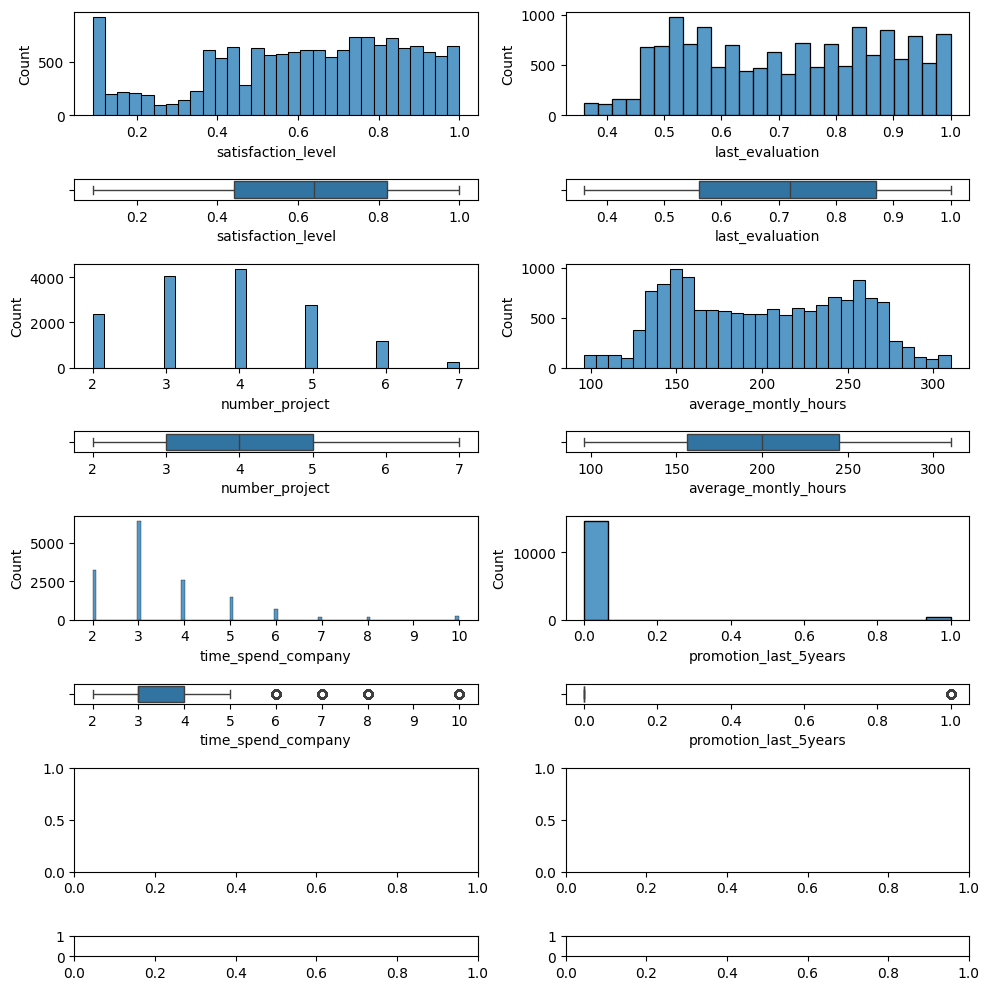

In [95]:
from utils import analisis_numerico_numerico
analisis_numerico_numerico(df, 'time_spend_company')

ValueError: Could not interpret value `l` for `x`. An entry with this name does not appear in `data`.

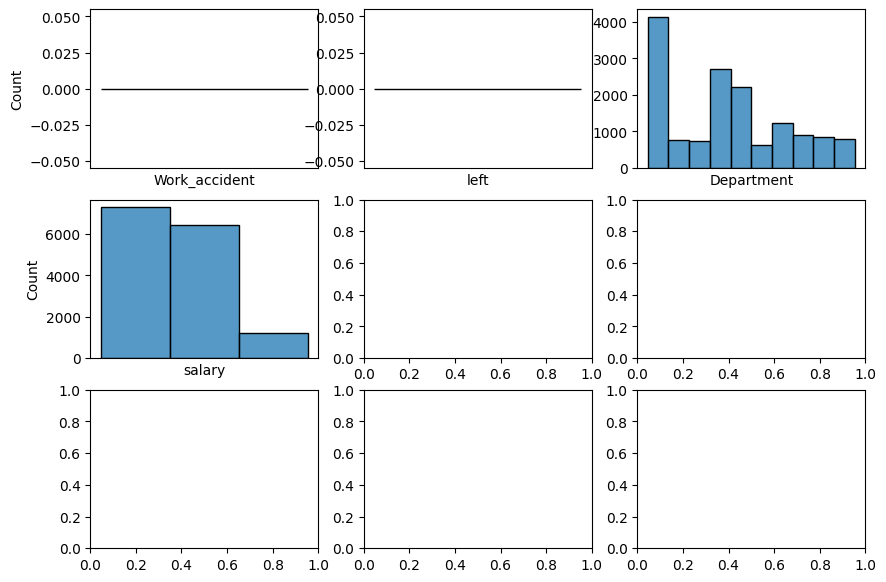

In [98]:
from utils import analisis_categorico_categorico
analisis_categorico_categorico(df,'left')